LEST'S BEGIN!

1. KNOW YOUR DATA

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LOADING DATASET

In [2]:
# Loading data set from csv file to Pandas Dataframe
titanic_data=pd.read_csv('train.csv')

In [3]:
# Dataset first look
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Counting number of rows and columns
titanic_data.shape

(891, 12)

In [5]:
# Getting some information about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Dataset Duplicate Value Count
len(titanic_data[titanic_data.duplicated()])

0

<Axes: ylabel='count'>

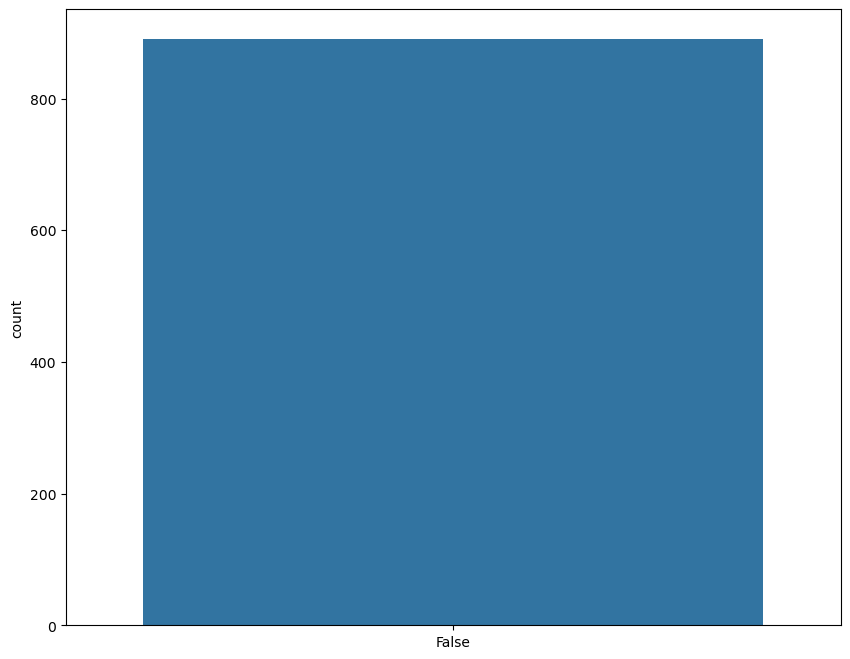

In [7]:
#Visulizing duplicate values through Count pot
plt.figure(figsize=(10,8))
sns.countplot(x=titanic_data.duplicated())

In [8]:
# Missing Values/Null Values Count
#Getting missing/Null values count in descending order to get a organized output
print(titanic_data.isnull().sum().sort_values(ascending=False))

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


Text(0.5, 1.0, 'Places of missing values in column')

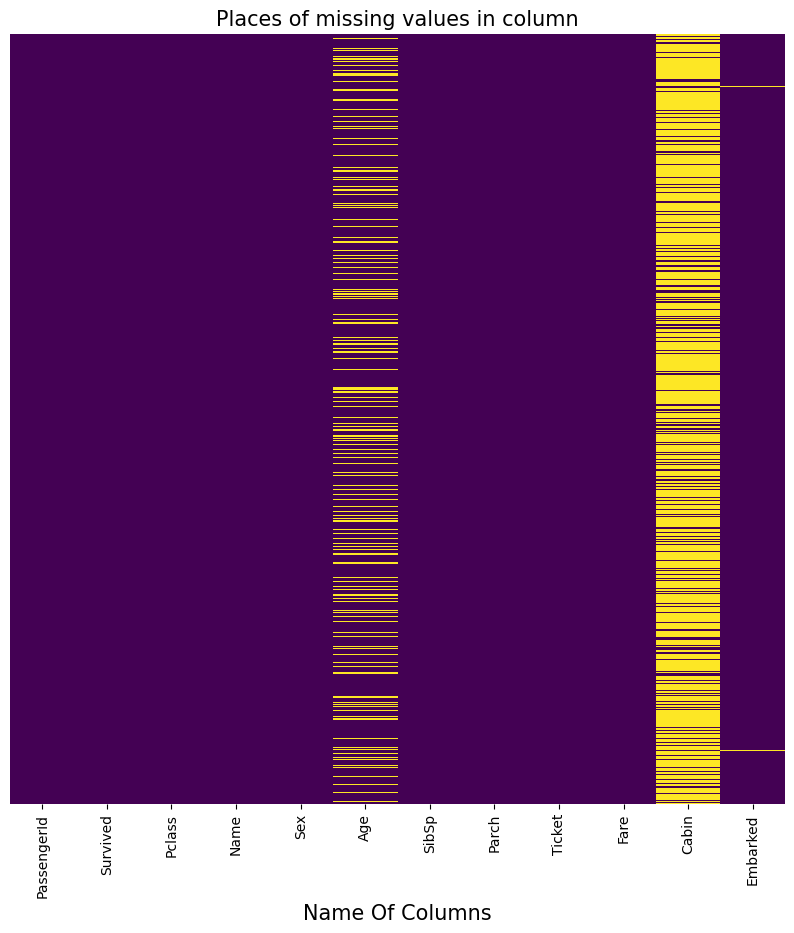

In [9]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap

plt.figure(figsize=(10,10))
sns.heatmap(titanic_data.isnull(), cbar=False, yticklabels=False,cmap='viridis')
plt.xlabel("Name Of Columns",fontsize=15)
plt.title("Places of missing values in column",fontsize=15)

2. UNDERSTANDING YOUR VARIABLES

In [10]:
# Dataset Columns
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
# Dataset Describe
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Variables description
1. PassengerId:  Passenger number

2. Survived:  0 = Dead 1 = Alive

3. Pclass:   1 = First class 2 = Second class 3 = Third class

4. Name:    Name of passenger

5. Sex:    Gender

6. Age:   Age of passenger

7. SibSp:   Number of siblings

8. Parch: -

9. Ticket:  Ticket

10. Fare:  -

In [12]:
# Check Unique Values for each variable.

for elem in titanic_data.columns.tolist():
  print("No. of unique values in ",elem,"is",titanic_data[elem].nunique() )

No. of unique values in  PassengerId is 891
No. of unique values in  Survived is 2
No. of unique values in  Pclass is 3
No. of unique values in  Name is 891
No. of unique values in  Sex is 2
No. of unique values in  Age is 88
No. of unique values in  SibSp is 7
No. of unique values in  Parch is 7
No. of unique values in  Ticket is 681
No. of unique values in  Fare is 248
No. of unique values in  Cabin is 147
No. of unique values in  Embarked is 3


In [13]:
#Checking unique values in categorical columns one by one
#1.Checking unique values in PassengerId column

titanic_data['PassengerId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [14]:
# Checking unique values in Survived column

titanic_data['Survived'].unique()

array([0, 1], dtype=int64)

In [15]:
# Checking unique values in Pclass column

titanic_data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [16]:
# Checking unique values in Name column

titanic_data['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [17]:
# Checking unique values in Sex column

titanic_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [18]:
# Checking unique values in Age column

titanic_data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [19]:
# Checking unique values in SibSp column

titanic_data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [20]:
# Checking unique values in Parch column

titanic_data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [21]:
# Checking unique values in Ticket column

titanic_data['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [22]:
# Checking unique values in Fare column

titanic_data['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [23]:
# Checking unique values in Cabin column

titanic_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [24]:
# Checking unique values in Embarked column

titanic_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

3. Data Wrangling
Data Wrangling Code

In [25]:

# Write your code to make your dataset analysis ready.
# missing values in Columns .
titanic_data.isnull().sum().sort_values(ascending = False)[:10]

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
dtype: int64

In [26]:
#Replacing null values of "Cabin" and "Fare" columns with value 0
titanic_data[['Cabin','Fare']] = titanic_data[['Cabin','Fare']].fillna(0)

In [27]:
# Checking if all null values are removed
titanic_data.isnull().sum().sort_values(ascending = False)[:10]

Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
dtype: int64

In [28]:
# Checking no of duplicate values in the dataset
len(titanic_data[titanic_data.duplicated()])
#Thus,this dataset contain 0 duplicate values

0

In [29]:
titanic_data.shape

(891, 12)

In [30]:
# Replacing the missing values in "Age" column with mean value

titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [31]:
# Finding the mode value of "Embarked" column

print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [32]:
print(titanic_data['Embarked'].mode()[0])

S


In [33]:
# Replacing the missing values in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [34]:
# Checking the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

BEGIN WITH DATA ANALYSIS

In [35]:
# Getting some stastical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
# Finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

In [37]:
sns.set()

In [38]:
import seaborn as sns
sns.set_theme(style="whitegrid")

<Axes: xlabel='Survived', ylabel='count'>

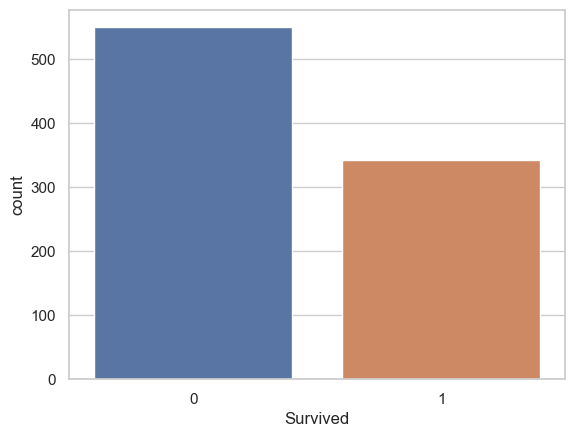

In [39]:

sns.countplot(x=titanic_data["Survived"])

Text(0.5, 1.0, 'Pie Chart of people Dead(0) or Alive(1)')

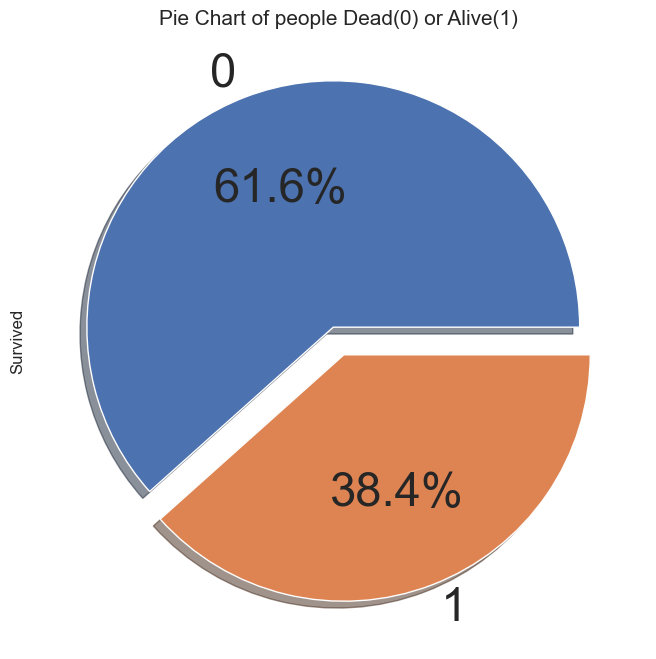

In [40]:
# Making a count plot for "Survived column"
titanic_data['Survived'].value_counts().plot.pie(explode=[0.06, 0.06], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=34)
plt.title('Pie Chart of people Dead(0) or Alive(1)',fontsize=15)

In [41]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Pie Chart of Sex')

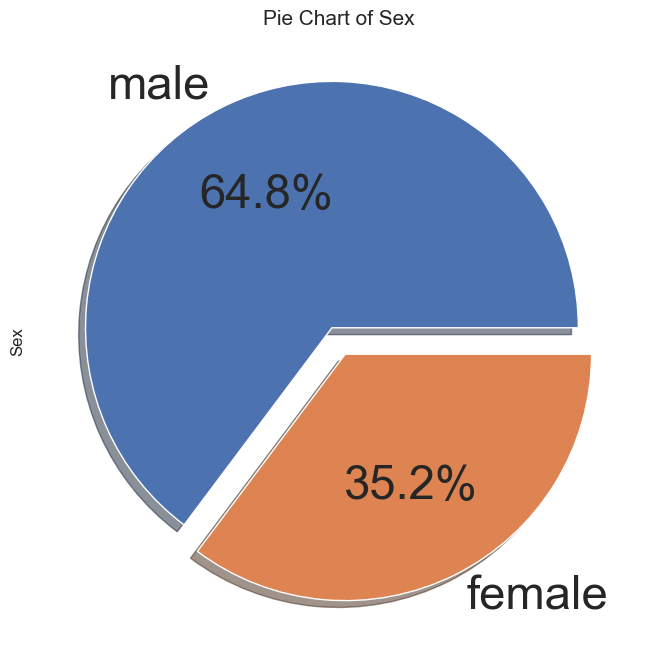

In [42]:
# Making a count plot for "Sex" column
titanic_data['Sex'].value_counts().plot.pie(explode=[0.06, 0.06], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=34)
plt.title('Pie Chart of Sex',fontsize=15)

Number of survivors gender wise


<Axes: xlabel='count', ylabel='Sex'>

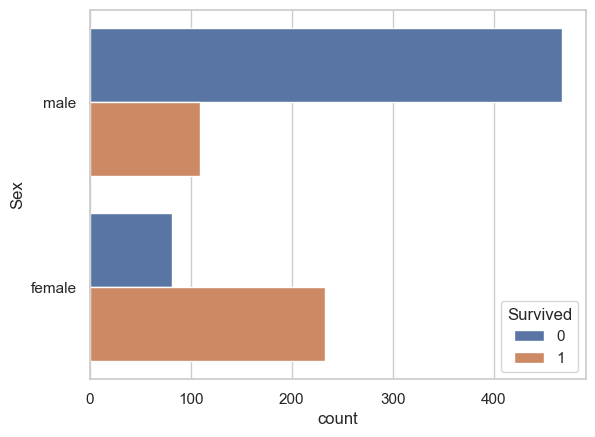

In [43]:
sns.countplot(data=titanic_data, y="Sex", hue="Survived")

In [44]:
# Making a count plot for "Pclass" column
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

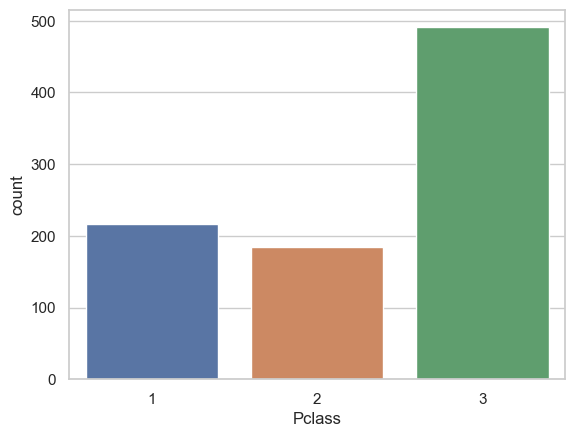

In [45]:
sns.countplot(x='Pclass', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

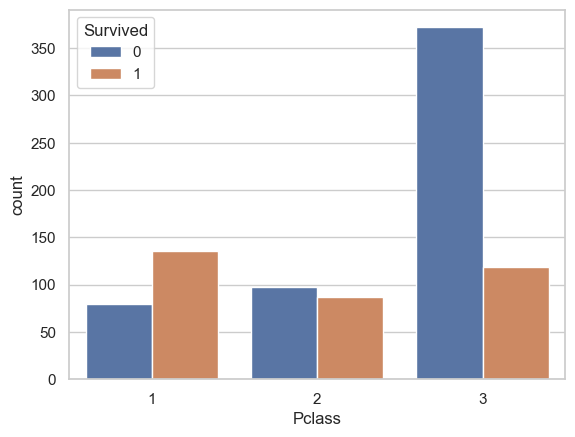

In [46]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

Encoding the Categorical columns

In [47]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [48]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

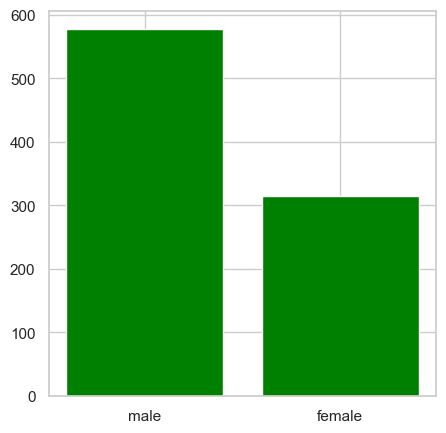

In [49]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_data['Sex'].value_counts().keys()),list(titanic_data['Sex'].value_counts()),color="Green")
plt.show()        


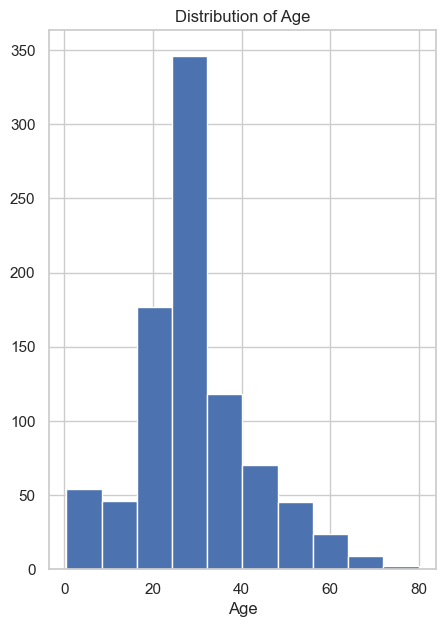

In [50]:
plt.figure(figsize=(5,7))
plt.hist(titanic_data['Age'])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

In [51]:
sum(titanic_data['Survived'].isnull())

0

In [52]:
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].mean())
titanic_data['Fare'] = titanic_data['Fare'].fillna(titanic_data['Fare'].mean())

In [53]:
Embarked = titanic_data['Embarked'].unique()
for Embarkeds in Embarked:
    print("->",Embarkeds)

-> S
-> C
-> Q


In [54]:
titanic_data['Embarked'] = titanic_data['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)
titanic_data['Sex'] = titanic_data['Sex'].map( {'female': 1,'male':0}).astype(int)

In [55]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int32
dtype: object

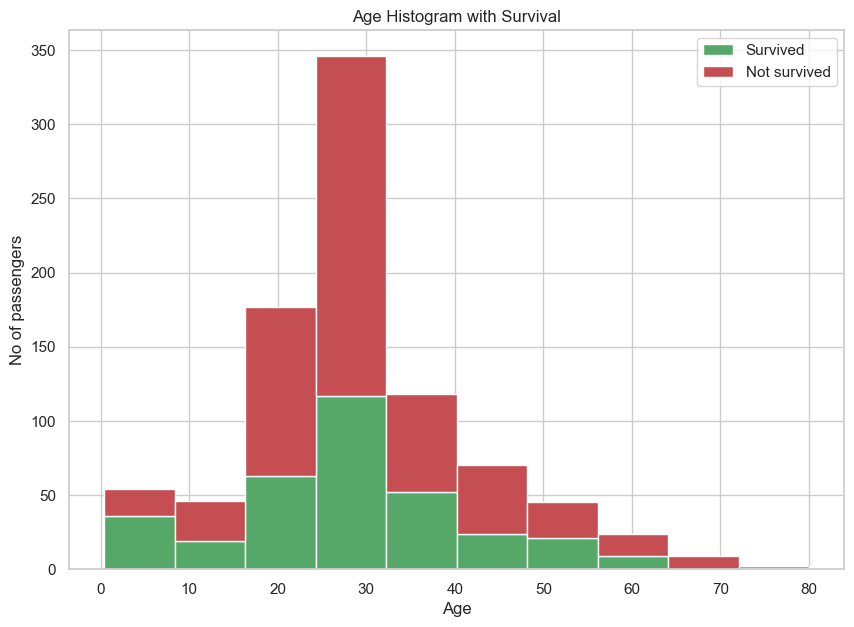

In [56]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [titanic_data[titanic_data['Survived']==1]['Age'], titanic_data[titanic_data['Survived']==0]['Age']],stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

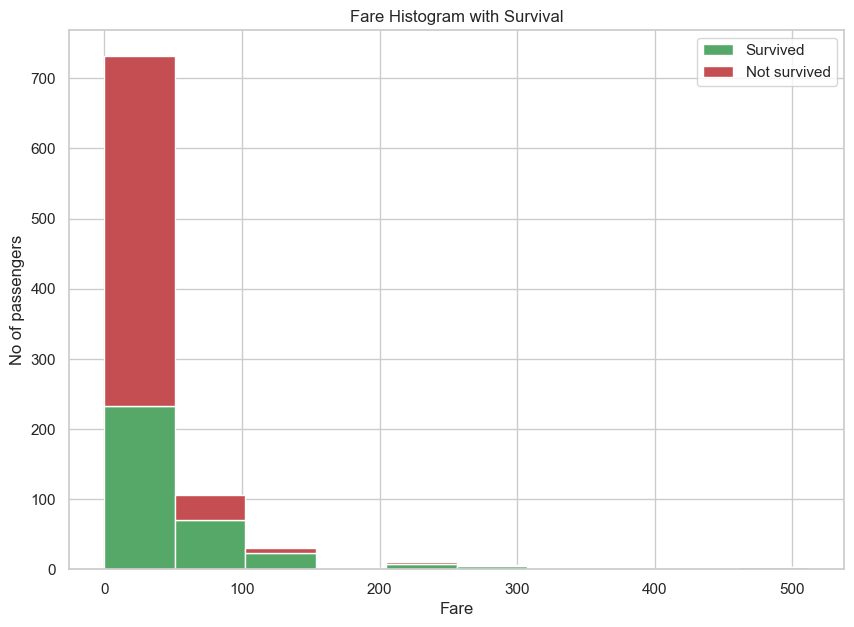

In [57]:
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [titanic_data[titanic_data['Survived']==1]['Fare'], titanic_data[titanic_data['Survived']==0]['Fare']], stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

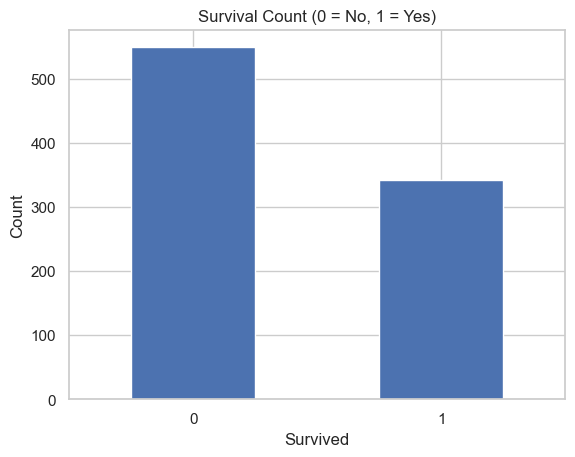

In [58]:
column = 'Survived'

# Create a bar chart
survival_counts = titanic_data[column].value_counts()
survival_counts.plot(kind='bar', rot=0)

# Adding labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count (0 = No, 1 = Yes)')

# Show the plot
plt.show()

<Axes: xlabel='SibSp', ylabel='count'>

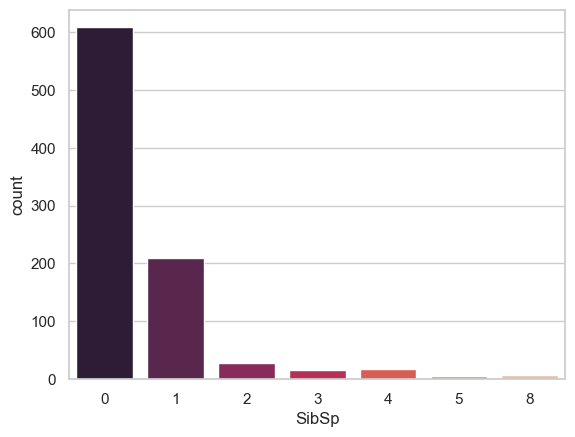

In [59]:
sns.countplot(x='SibSp', data=titanic_data, palette='rocket')

<Axes: ylabel='Frequency'>

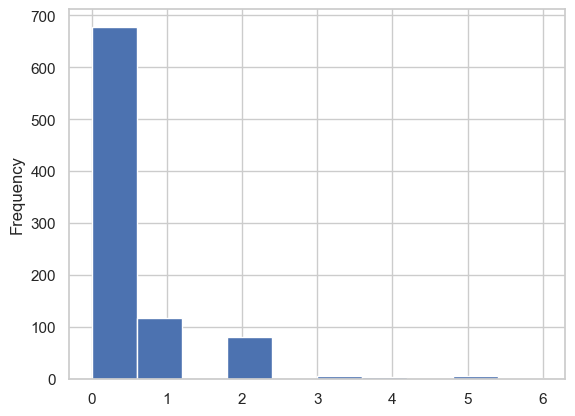

In [60]:
titanic_data['Parch'].plot.hist()


<Axes: xlabel='Parch', ylabel='count'>

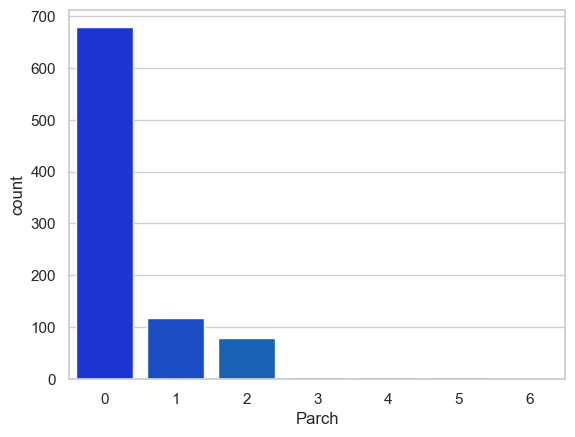

In [61]:
sns.countplot(x='Parch', data=titanic_data, palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

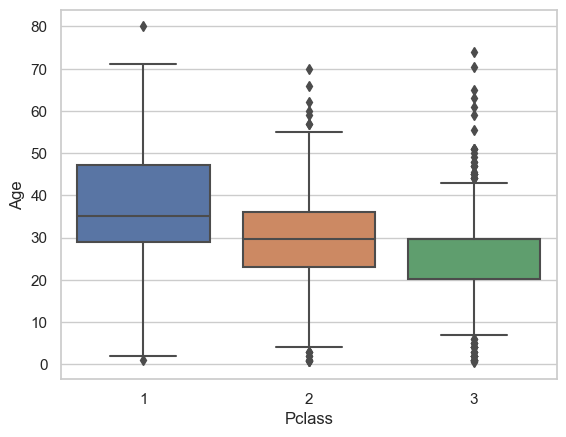

In [62]:
sns.boxplot(x='Pclass', y='Age', data=titanic_data)


In [63]:
titanic_data.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex        Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.000000      1   
2                               Heikkinen, Miss. Laina    1  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.000000      1   
4                             Allen, Mr. William Henry    0  35.000000      0   
..                         

In [64]:
pd.get_dummies(titanic_data['Sex']).head()

,0,1
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [65]:
Sex=pd.get_dummies(titanic_data['Sex'], drop_first=True)
Sex.head(4)

,1
0,0
1,1
2,1
3,1


In [66]:
embark= pd.get_dummies(titanic_data['Embarked'])

In [67]:
embark.head(4)

,0,1,2
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0


In [68]:
embark=pd.get_dummies(titanic_data['Embarked'], drop_first=True)
embark.head(4)

,1,2
0,1,0
1,0,1
2,1,0
3,1,0


In [69]:
Pcl=pd.get_dummies(titanic_data['Pclass'], drop_first=True)
Pcl.head(4)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0


In [70]:
titanic=pd.concat([titanic_data, Sex, embark, Pcl], axis=1)

titanic.head(4)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,1,1,2,2,3
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,1,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,1,1,0,0,0


In [71]:
titanic.drop(['Name','PassengerId','Pclass',"Ticket",'Sex','Embarked'], axis=1, inplace=True)
     

titanic.head(3)


,Survived,Age,SibSp,Parch,Fare,Cabin,1,1,2,2,3
0,0,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,C85,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,1,1,0,0,1


Thankyou!